In [ ]:
#Scrambled Words
# 1 of 27
word = input("Please enter a one-word string: ")

# STRING TO LIST
listOfLetters = list(word)
print("A list of the word's letters is:", listOfLetters)

# LIST TO STRING
wordString = ''.join(listOfLetters)
print("That list reassembled as a string is:", wordString)


Please enter a one-word string: ALPHABET
A list of the word's letters is: ['A', 'L', 'P', 'H', 'A', 'B', 'E', 'T']
That list reassembled as a string is: ALPHABET


In [ ]:
#Bestsellers
#2 of 27
def get_books_from_input():
    '''Prompts the user to input book data one at a time. Ends when user types DONE.'''
    books = []
    print("Enter book data as: title, author, year")
    print("Type 'DONE' when you are finished entering books.\n")

    while True:
        line = input("Enter book info: ").strip()
        if line.lower() == "done":
            break
        parts = line.split(',')
        if len(parts) != 3:
            print("Invalid format. Please enter: title, author, year")
            continue
        title = parts[0].strip()
        author = parts[1].strip()
        year = parts[2].strip()
        books.append((title, author, year))

    return books

def search_by_title(books):
    keyword = input("Enter title keyword: ").strip().lower()
    found = [book for book in books if keyword in book[0].lower()]
    display_results(found)

def search_by_author(books):
    keyword = input("Enter author keyword: ").strip().lower()
    found = [book for book in books if keyword in book[1].lower()]
    display_results(found)

def search_by_year(books):
    year = input("Enter year: ").strip()
    found = [book for book in books if book[2] == year]
    display_results(found)

def display_all_books(books):
    display_results(books)

def display_results(results):
    if results:
        for title, author, year in results:
            print(f"\nTitle : {title}\nAuthor: {author}\nYear  : {year}\n" + "-"*40)
    else:
        print("No books found.\n")

def main():
    books = get_books_from_input()
    if not books:
        print("No books entered. Exiting program.")
        return

    while True:
        print("\nMenu Options:")
        print("1. Search books by title keyword")
        print("2. Search books by author keyword")
        print("3. Search books by year")
        print("4. Display all books")
        print("Q. Quit")

        choice = input("Select an option: ").strip().lower()

        if choice == '1':
            search_by_title(books)
        elif choice == '2':
            search_by_author(books)
        elif choice == '3':
            search_by_year(books)
        elif choice == '4':
            display_all_books(books)
        elif choice == 'q':
            print("Exiting the program.")
            break
        else:
            print("Invalid option. Please try again.")

if __name__ == "__main__":
    main()


Enter book data as: title, author, year
Type 'DONE' when you are finished entering books.

Enter book info: title, author, year
Enter book info: The Hobbit, J.R.R. Tolkien, 1937
Enter book info: Pride and Prejudice, Jane Austen, 1813
Enter book info: 1984, George Orwell, 1949
Enter book info: DONE

Menu Options:
1. Search books by title keyword
2. Search books by author keyword
3. Search books by year
4. Display all books
Q. Quit
Select an option: 4

Title : title
Author: author
Year  : year
----------------------------------------

Title : The Hobbit
Author: J.R.R. Tolkien
Year  : 1937
----------------------------------------

Title : Pride and Prejudice
Author: Jane Austen
Year  : 1813
----------------------------------------

Title : 1984
Author: George Orwell
Year  : 1949
----------------------------------------

Menu Options:
1. Search books by title keyword
2. Search books by author keyword
3. Search books by year
4. Display all books
Q. Quit
Select an option: q
Exiting the progr

In [ ]:
#Baseball
#3 of 27
def show_help():
    print("""
Commands:
HELP                 - Show help
INPUT                - Enter player data ('DONE' to stop)
TEAM <team_id>       - Show players from a team
REPORT n HITS        - Top n by hits
REPORT n BATTING     - Top n by average
REPORT n SLUGGING    - Top n by slugging
QUIT                 - Exit
""")

def parse_record(line):
    parts = line.strip().split(";")
    if len(parts) != 9: return None
    try: return (parts[0], parts[1], parts[2], *map(int, parts[3:]))
    except: return None

def avg(p): return p[5] / p[3] if p[3] else 0
def slg(p):
    s = p[5] - (p[6]+p[7]+p[8])
    tb = s + 2*p[6] + 3*p[7] + 4*p[8]
    return tb / p[3] if p[3] else 0

def display(players):
    if not players: print("No players found.\n"); return
    print("{:<10} {:<10} {:<6} {:>3} {:>3} {:>3} {:>3} {:>3} {:>3} {:>7} {:>7}".format(
        "First","Last","Team","AB","R","H","2B","3B","HR","AVG","SLG"))
    for p in players:
        print("{:<10} {:<10} {:<6} {:>3} {:>3} {:>3} {:>3} {:>3} {:>3} {:>7.3f} {:>7.3f}".format(
            p[0],p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],avg(p),slg(p)))
    print()

def team(data, team_id):
    players = [p for p in data if p[2].lower() == team_id.lower()]
    display(sorted(players, key=lambda x: (x[0].lower(), x[1].lower())))

def report(data, n, kind):
    key = {"HITS": lambda p: -p[5], "BATTING": lambda p: -avg(p), "SLUGGING": lambda p: -slg(p)}.get(kind)
    if not key: print("Invalid category."); return
    display(sorted(data, key=lambda p: (key(p), p[1].lower(), p[0].lower()))[:n])

def main():
    data = []
    print("Baseball Stats Program")
    while True:
        cmd = input(">>> ").strip().split()
        if not cmd: continue
        action = cmd[0].lower()
        if action == "quit": break
        elif action == "help": show_help()
        elif action == "input":
            data = []; print("Enter records ('DONE' to stop):")
            while True:
                line = input()
                if line.lower() == "done": break
                rec = parse_record(line)
                if rec: data.append(rec)
                else: print("Invalid format.")
        elif action == "team" and len(cmd) == 2:
            team(data, cmd[1])
        elif action == "report" and len(cmd) == 3:
            try: report(data, int(cmd[1]), cmd[2].upper())
            except: print("Invalid number.")
        else: print("Invalid command. Type HELP.")

if __name__ == "__main__":
    main()


Baseball Stats Program
>>> input
Enter records ('DONE' to stop):
John;Doe;AAA;10;2;4;1;0;0
Jane;Smith;BBB;12;3;6;2;1;1
Alex;Brown;AAA;8;1;3;0;0;1
done


KeyboardInterrupt: Interrupted by user

In [ ]:
# ScrambledEnglish
#4 of 27
word = input("Please enter a one-word string: ")

# STRING TO LIST:
# list() function iterates through the string,
# making each letter a string element of the list.
letters_list = list(word)
print("A list of the word's letters is:",letters_list)

# LIST TO STRING:
# join() function assembles letters of a list,
# with the lead string between each letter.
# If that lead string is the empty string,
# it just makes the list of letters a single string.
word_str=''.join(letters_list)
print("That list reassembled as a string is:",word_str)
word_str = ','.join(letters_list)
print("Now with commas", word_str)

Please enter a one-word string: computer
A list of the word's letters is: ['c', 'o', 'm', 'p', 'u', 't', 'e', 'r']
That list reassembled as a string is: computer
Now with commas c,o,m,p,u,t,e,r


In [ ]:
# LatinParts
#5 of 27
def get_parts():
    print("Paste rootsPrefixesSuffixes.txt content (DONE to end):")
    p, r, s, sec = [], [], [], None
    while True:
        l = input().strip()
        if l.upper() == "DONE": break
        if not l or l.startswith("#"):
            if "prefix" in l.lower(): sec = p
            elif "root" in l.lower(): sec = r
            elif "suffix" in l.lower(): sec = s
        elif sec is not None:
            sec.append(l.split()[0])
    return p, r, s

def get_words():
    print("Paste word list (DONE to end):")
    return [w.lower() for w in iter(input, "DONE") if w.strip()]

def count(words, parts, kind):
    return {x: sum(w.startswith(x) if kind=="prefix" else w.endswith(x) if kind=="suffix" else x in w for w in words) for x in parts}

def show(c, title):
    print(f"\n{title}")
    for k in sorted(c): print(f"{k:<12} {c[k]}")

def main():
    p, r, s = get_parts()
    w = get_words()
    show(count(w, p, "prefix"), "Prefix Counts")
    show(count(w, r, "root"), "Root Counts")
    show(count(w, s, "suffix"), "Suffix Counts")

main()


Paste the content of rootsPrefixesSuffixes.txt. Type DONE on a new line when finished:
pre
co
in
port
dict
struct
ing
ed
tion
done
Paste the words from longWordList.txt, one per line. Type DONE when finished:
done

Prefix Counts

Root Counts

Suffix Counts


In [ ]:
# Anagrams
#6 of 27
def main():
    words = input("Enter words separated by space:\n").split()
    from collections import defaultdict
    groups = defaultdict(list)

    for word in words:
        key = ''.join(sorted(word))
        groups[key].append(word)

    counts = defaultdict(int)
    max_len = 0
    for g in groups.values():
        if len(g) > 1:
            counts[len(g)] += 1
            max_len = max(max_len, len(g))

    for i in sorted(counts):
        print(f"{i}-word anagrams: {counts[i]}")

    print("\nMost anagrams:", ', '.join(sorted(groups[max(groups, key=lambda k: len(groups[k]))])))

main()


Enter words separated by space:
listen silent enlist rat tar art evil vile veil live angel glean angle stone tones notes onset
3-word anagrams: 3
4-word anagrams: 2

Most anagrams: evil, live, veil, vile


In [ ]:
# SearchFiles
#7 of 27
def remove_stopwords(text):
    stop = {"a", "an", "the", "in", "on", "at", "is", "are", "was", "were", "to", "and", "or", "of"}
    return [w for w in text.lower().split() if w not in stop]

query = input("Enter query: ")
clean_query = remove_stopwords(query)
doc_count = int(input("How many documents? "))

for i in range(doc_count):
    print(f"\nDocument {i+1}:")
    lines = []
    print("Enter lines (type DONE to end):")
    while True:
        line = input()
        if line.strip().upper() == "DONE": break
        lines.append(line)
    found = False
    for line in lines:
        if ' '.join(clean_query) in ' '.join(remove_stopwords(line)).lower():
            print("Match found:", line)
            found = True
            break
    if not found:
        print("No match found.")


Enter query: the quick brown fox
How many documents? 1

Document 1:
Enter lines (type DONE to end):
A lazy dog watched the quick brown fox jump.
Some other line.
done
Match found: A lazy dog watched the quick brown fox jump.


In [ ]:
# Pascal
#8 of 27
def pascal_triangle(n):
    tri = [[1]]
    for i in range(1, n):
        row = [1]
        for j in range(1, i):
            row.append(tri[i-1][j-1] + tri[i-1][j])
        row.append(1)
        tri.append(row)
    return tri

while True:
    try:
        h = int(input("Enter the triangle height (positive number): "))
        if h > 0:
            break
        print("Please enter a positive number.")
    except:
        print("Invalid input.")

triangle = pascal_triangle(h)
for row in triangle:
    print(' '.join(map(str, row)))


Enter the triangle height (positive number): 5
1
1 1
1 2 1
1 3 3 1
1 4 6 4 1


In [ ]:
# Glass
#9 of 27
from math import pi
def get_glasses():
    n = int(input("Enter number of glasses: "))
    return [tuple(map(float, input(f"Glass {i+1} (vol height dens thick): ").split())) for i in range(n)]
def box_arrange(n):
    from math import ceil, sqrt
    r = ceil(sqrt(n))
    c = ceil(n / r)
    s = 1
    return (r, c, s)
def glass_radius(g): return (g[0] / (pi * g[1]))**0.5
def glass_weight(g): return g[0] * g[2]
def total_weight(glasses): return sum(glass_weight(g) for g in glasses)
def box_size(glasses, arrangement):
    r, c, s = arrangement
    max_rad = max(glass_radius(g) + g[3] for g in glasses)
    max_h = max(g[1] + g[3] for g in glasses)
    return (2*max_rad*c, 2*max_rad*r, max_h*s)
def print_glass(g):
    print(f"Volume: {g[0]} oz, Height: {g[1]} in, Density: {g[2]} oz/in³, Thickness: {g[3]} in")
def display(glasses, box_dim, arrangement, weight):
    print("\nArrangement: {} x {} x {}".format(*arrangement))
    print("Box Size: {:.2f} in x {:.2f} in x {:.2f} in".format(*box_dim))
    print("Total Weight: {:.2f} oz / {:.2f} lbs".format(weight, weight/16))
def main():
    glasses = get_glasses()
    for g in glasses: print_glass(g)
    arr = box_arrange(len(glasses))
    dims = box_size(glasses, arr)
    w = total_weight(glasses)
    display(glasses, dims, arr, w)
main()

Enter number of glasses: 2
Glass 1 (vol height dens thick): 12 5 0.3 0.1
Glass 2 (vol height dens thick): 16 6 0.4 0.2
Volume: 12.0 oz, Height: 5.0 in, Density: 0.3 oz/in³, Thickness: 0.1 in
Volume: 16.0 oz, Height: 6.0 in, Density: 0.4 oz/in³, Thickness: 0.2 in

Arrangement: 2 x 1 x 1
Box Size: 2.24 in x 4.49 in x 6.20 in
Total Weight: 10.00 oz / 0.62 lbs


In [ ]:
def get_region_data():
    valid_regions = ["Northeast", "South", "Midwest", "West"]
    while True:
        region = input("Enter a region (Northeast, South, Midwest, West): ").strip()
        if region in valid_regions:
            break
        else:
            print("Invalid region. Try again.")

    while True:
        try:
            num_states = int(input(f"How many states are in the {region} region? "))
            if num_states > 0:
                break
        except ValueError:
            print("Enter a valid number.")

    print("Enter data for each state:")
    print("For each state, input: name, population, GDP, PI, Sub, CE, TPI")

    data = {}

    for i in range(num_states):
        while True:
            try:
                entry = input(f"Enter data for state {i+1}/{num_states} (comma-separated): ")
                parts = entry.split(',')
                if len(parts) != 7 + 1:
                    raise ValueError
                state = parts[0].strip()
                values = list(map(float, parts[1:]))
                pop = values[0]
                gdp_per_capita = values[1] / pop
                pi_per_capita = values[2] / pop
                data[state] = values + [gdp_per_capita, pi_per_capita]  # now list has 8 elements
                break
            except:
                print("Invalid input. Format: name, population, GDP, PI, Sub, CE, TPI")

    return region, data

def display_region_summary(region, data):
    print("\n--- Region Summary ---\n")

    # GDP per capita is at index 6, PI per capita at 7
    max_gdp = max(data.items(), key=lambda x: x[1][6])
    min_gdp = min(data.items(), key=lambda x: x[1][6])
    max_pi = max(data.items(), key=lambda x: x[1][7])
    min_pi = min(data.items(), key=lambda x: x[1][7])

    print(f"Highest GDP per capita: {max_gdp[0]} with ${max_gdp[1][6]:,.2f}")
    print(f"Lowest GDP per capita : {min_gdp[0]} with ${min_gdp[1][6]:,.2f}")
    print(f"Highest PI per capita : {max_pi[0]} with ${max_pi[1][7]:,.2f}")
    print(f"Lowest PI per capita  : {min_pi[0]} with ${min_pi[1][7]:,.2f}")

    print("\nState Data:")
    print(f"{'State':<15}{'Pop':>12}{'GDP':>12}{'PI':>12}{'Sub':>12}{'CE':>12}{'TPI':>12}{'GDPp':>12}{'PIp':>12}")
    for state in sorted(data):
        vals = data[state]
        print(f"{state:<15}{int(vals[0]):>12,}{int(vals[1]):>12,}{int(vals[2]):>12,}"
              f"{int(vals[3]):>12,}{int(vals[4]):>12,}{int(vals[5]):>12,}"
              f"{int(vals[6]):>12,}{int(vals[7]):>12,}")

def main():Texas,30000000,1800000000000,1500000000000,50000000,40000000,2000000000ta = get_region_data()
    display_region_summary(region, data)

if __name__ == "__main__":
    main()


Enter a region (Northeast, South, Midwest, West): South
How many states are in the South region? 1
Enter data for each state:
For each state, input: name, population, GDP, PI, Sub, CE, TPI
Enter data for state 1/1 (comma-separated): Texas,30000000,1800000000000,1500000000000,50000000,40000000,2000000000
Invalid input. Format: name, population, GDP, PI, Sub, CE, TPI
Enter data for state 1/1 (comma-separated): Texas,30000000,1800000000000,1500000000000,50000000,40000000,2000000000
Invalid input. Format: name, population, GDP, PI, Sub, CE, TPI
Enter data for state 1/1 (comma-separated): Texas,30000000,1800000000000,1500000000000,50000000,40000000,2000000000
Invalid input. Format: name, population, GDP, PI, Sub, CE, TPI
Enter data for state 1/1 (comma-separated): 
Invalid input. Format: name, population, GDP, PI, Sub, CE, TPI
Enter data for state 1/1 (comma-separated): Texas, 30000000, 1800000000000, 1500000000000, 50000000, 40000000, 2000000000
Invalid input. Format: name, population, GDP

In [ ]:
# Poverty
#10 of 27
def print_data(name, percent, count, income):
    print(f"\nCounty: {name}")
    print(f"Children in poverty: {count:,}")
    print(f"Percent in poverty: {percent:.1f}%")
    print(f"Median household income: ${income:,}")

def print_highest_data(data):
    highest = max(data.items(), key=lambda x: x[1]['percent'])
    name, stats = highest
    print("\n--- County with Highest Poverty Percentage ---")
    print_data(name, stats['percent'], stats['count'], stats['income'])

def print_lowest_data(data):
    lowest = min(data.items(), key=lambda x: x[1]['percent'])
    name, stats = lowest
    print("\n--- County with Lowest Poverty Percentage ---")
    print_data(name, stats['percent'], stats['count'], stats['income'])

def print_county_data(data):
    while True:
        name = input("\nEnter county name (or 'q' to quit): ").strip().lower()
        if name in ['q', 'quit']:
            break
        found = False
        for county, stats in data.items():
            if county.lower() == name:
                print_data(county, stats['percent'], stats['count'], stats['income'])
                found = True
                break
        if not found:
            print("County not found. Please try again.")

def main():
    data = {}

    while True:
        try:
            n = int(input("How many counties do you want to enter data for? "))
            if n > 0:
                break
        except:
            print("Enter a valid number.")

    for i in range(n):
        print(f"\nEnter data for county {i+1}/{n}:")
        name = input("County name: ").strip()
        while True:
            try:
                count = int(input("Number of children in poverty: "))
                percent = float(input("Percentage of children in poverty: "))
                income = int(input("Median household income: "))
                break
            except:
                print("Invalid entry. Please enter valid numbers.")
        data[name] = {'count': count, 'percent': percent, 'income': income}

    print_highest_data(data)
    print_lowest_data(data)
    print_county_data(data)

if __name__ == "__main__":
    main()


How many counties do you want to enter data for? 3

Enter data for county 1/3:
County name: Wayne
Number of children in poverty: 100000
Percentage of children in poverty: 40.2
Median household income: 42000

Enter data for county 2/3:
County name: Clinton
Number of children in poverty: 2000
Percentage of children in poverty: 12.5
Median household income: 63000

Enter data for county 3/3:
County name: Kent
Number of children in poverty: 15000
Percentage of children in poverty: 22.8
Median household income: 54000

--- County with Highest Poverty Percentage ---

County: Wayne
Children in poverty: 100,000
Percent in poverty: 40.2%
Median household income: $42,000

--- County with Lowest Poverty Percentage ---

County: Clinton
Children in poverty: 2,000
Percent in poverty: 12.5%
Median household income: $63,000

Enter county name (or 'q' to quit): q


In [ ]:
#WordCompletion
#11 of 27
import string
def fill_completions(c_dict, words):
    for word in words:
        word = word.strip(string.punctuation).lower()
        if not word.isalpha() or len(word) <= 1:
            continue
        for i, ch in enumerate(word):
            key = (i, ch)
            if key not in c_dict:
                c_dict[key] = set()
            c_dict[key].add(word)
def find_completions(prefix, c_dict):
    prefix = prefix.lower()
    completions = None
    for i, ch in enumerate(prefix):
        key = (i, ch)-
        if key not in c_dict:
            return set()
        if completions is None:
            completions = c_dict[key].copy()
        else:
            completions &= c_dict[key]
        if not completions:
            return set()
    return completions if completions else set()
def main():
    # Simulated "file content"
    sample_text = """
    Python programming is powerful. PyCharm is a great IDE.
    People like pizza and pandas.
    <NEW DOCUMENT>
    Peter Piper picked a peck of pickled peppers.
    Programming in Python provides productivity.
    """
    # Simulate splitting file content into words
    all_words = sample_text.split()
    # Create and fill completions dictionary
    c_dict = {}
    fill_completions(c_dict, all_words)
    # Interactive loop
    while True:
        prefix = input("\nEnter a prefix to complete ('#' to quit): ").strip()
        if prefix == '#':
            break
        results = find_completions(prefix, c_dict)
        if results:
            print("Completions found:", results)
        else:
            print("No completions found for that prefix.")

if __name__ == "__main__":
    main()



Enter a prefix to complete ('#' to quit): pro
Completions found: {'productivity', 'programming', 'provides'}

Enter a prefix to complete ('#' to quit): pi
Completions found: {'piper', 'picked', 'pizza', 'pickled'}

Enter a prefix to complete ('#' to quit): zzz
No completions found for that prefix.

Enter a prefix to complete ('#' to quit): #


Age vs BMI: slope=0.0421, intercept=23.3130, corr=0.2533
Weight vs BMI: slope=0.1401, intercept=14.7338, corr=0.8432


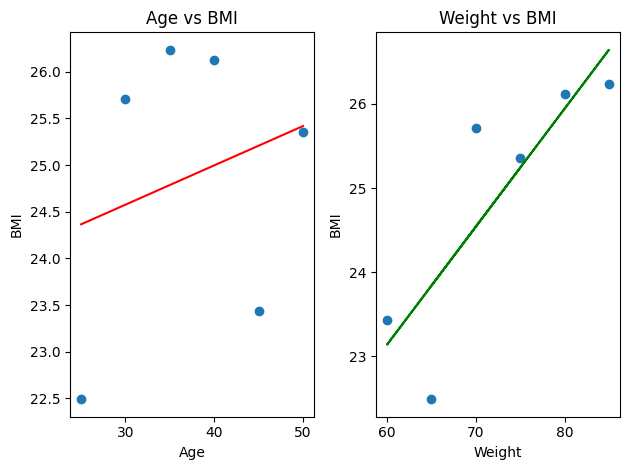

In [ ]:
#BMI: Body Mass Index
#12 of 27
import math, matplotlib.pyplot as plt

# Sample Data: Age (yrs), Height (cm), Weight (kg)
ages = [25, 30, 35, 40, 45, 50]
heights = [170, 165, 180, 175, 160, 172]
weights = [65, 70, 85, 80, 60, 75]

# Calculate BMI = kg / m²
bmi = [w / ((h / 100) ** 2) for w, h in zip(weights, heights)]

# Linear Regression + Correlation
def lin_reg(x, y):
    n = len(x)
    sx, sy = sum(x), sum(y)
    sxy = sum(i*j for i,j in zip(x,y))
    sx2 = sum(i**2 for i in x)
    sy2 = sum(j**2 for j in y)
    slope = (n*sxy - sx*sy) / (n*sx2 - sx**2)
    intercept = (sy - slope*sx) / n
    corr = (n*sxy - sx*sy) / math.sqrt((n*sx2 - sx**2)*(n*sy2 - sy**2))
    return slope, intercept, corr

s1, i1, c1 = lin_reg(ages, bmi)
s2, i2, c2 = lin_reg(weights, bmi)

print(f"Age vs BMI: slope={s1:.4f}, intercept={i1:.4f}, corr={c1:.4f}")
print(f"Weight vs BMI: slope={s2:.4f}, intercept={i2:.4f}, corr={c2:.4f}")

# Plot
plt.subplot(1, 2, 1)
plt.scatter(ages, bmi); plt.plot(ages, [s1*x + i1 for x in ages], 'r')
plt.title("Age vs BMI"); plt.xlabel("Age"); plt.ylabel("BMI")

plt.subplot(1, 2, 2)
plt.scatter(weights, bmi); plt.plot(weights, [s2*x + i2 for x in weights], 'g')
plt.title("Weight vs BMI"); plt.xlabel("Weight"); plt.ylabel("BMI")

plt.tight_layout(); plt.show()


In [ ]:
#Income Classifier
#13 of 27
from collections import defaultdict

# Attributes to use (indices or keys from dict)
# Using attribute names as keys for clarity
CONTINUOUS_ATTRS = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
CATEGORICAL_ATTRS = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex']

def initialize_model_dict():
    """
    Initialize model dictionaries for continuous and categorical attributes.
    Returns a dict with structure:
    {
      'continuous': {attr: {'sum': 0.0, 'count': 0}, ...},
      'categorical': {attr: {category: count, ...}, ...}
    }
    """
    model = {'continuous': {}, 'categorical': {}}
    for attr in CONTINUOUS_ATTRS:
        model['continuous'][attr] = {'sum': 0.0, 'count': 0}
    for attr in CATEGORICAL_ATTRS:
        model['categorical'][attr] = defaultdict(int)
    return model

def calculate_averages(model):
    """
    Convert sums and counts for continuous to averages,
    and counts for categorical to ratios.
    Modifies the model in place.
    """
    # For continuous
    for attr, val in model['continuous'].items():
        if val['count'] > 0:
            model['continuous'][attr] = val['sum'] / val['count']
        else:
            model['continuous'][attr] = 0.0  # no data edge case

    # For categorical
    for attr, cat_counts in model['categorical'].items():
        total = sum(cat_counts.values())
        if total > 0:
            for cat in cat_counts:
                cat_counts[cat] = cat_counts[cat] / total
        else:
            # no data edge case
            model['categorical'][attr] = {}

def trainClassifier(training_data):
    """
    Train classifier given training_data list of dicts.
    Returns two models: model_gt_50k, model_lte_50k
    Each model is a dict as described above.
    """
    model_gt_50k = initialize_model_dict()
    model_lte_50k = initialize_model_dict()

    for record in training_data:
        cls = record['class']
        model = model_gt_50k if cls == '>50K' else model_lte_50k

        # Continuous attrs
        for attr in CONTINUOUS_ATTRS:
            val = float(record[attr])
            model['continuous'][attr]['sum'] += val
            model['continuous'][attr]['count'] += 1

        # Categorical attrs
        for attr in CATEGORICAL_ATTRS:
            cat_val = record[attr]
            model['categorical'][attr][cat_val] += 1

    # Calculate averages and ratios for both models
    calculate_averages(model_gt_50k)
    calculate_averages(model_lte_50k)

    return model_gt_50k, model_lte_50k

def attribute_closeness(val, attr, model_gt_50k, model_lte_50k):
    """
    For a given attribute value val and attribute name attr,
    return which model (">50K" or "<=50K") this attribute is closer to.
    For continuous attributes, compare absolute difference to averages.
    For categorical attributes, compare ratio values.
    """
    if attr in CONTINUOUS_ATTRS:
        avg_gt = model_gt_50k['continuous'].get(attr, 0)
        avg_lte = model_lte_50k['continuous'].get(attr, 0)
        diff_gt = abs(float(val) - avg_gt)
        diff_lte = abs(float(val) - avg_lte)
        return '>50K' if diff_gt < diff_lte else '<=50K'
    else:
        ratio_gt = model_gt_50k['categorical'].get(attr, {}).get(val, 0)
        ratio_lte = model_lte_50k['categorical'].get(attr, {}).get(val, 0)
        return '>50K' if ratio_gt > ratio_lte else '<=50K'

def classifyTestRecords(test_data, model_gt_50k, model_lte_50k):
    """
    Classify each record in test_data based on closeness to >50K or <=50K models.
    Returns a list of predicted classes.
    """
    predictions = []
    for record in test_data:
        votes = {'>50K': 0, '<=50K': 0}
        for attr in CONTINUOUS_ATTRS + CATEGORICAL_ATTRS:
            val = record[attr]
            closer_model = attribute_closeness(val, attr, model_gt_50k, model_lte_50k)
            votes[closer_model] += 1
        predicted_class = '>50K' if votes['>50K'] > votes['<=50K'] else '<=50K'
        predictions.append(predicted_class)
    return predictions

def reportAccuracy(test_data, predictions):
    """
    Compare predictions to actual classes in test_data,
    print number correct, total, and percentage accuracy.
    """
    correct = 0
    total = len(test_data)
    for record, pred in zip(test_data, predictions):
        if record['class'] == pred:
            correct += 1
    accuracy = (correct / total) * 100 if total > 0 else 0
    print(f"Accuracy: {correct}/{total} correct ({accuracy:.2f}%)")

# ======= Example usage with dummy data =======
if __name__ == "__main__":
    # Example dummy training data (list of dicts)
    training_data = [
        {'age': '25', 'workclass': 'Private', 'education_num': '10', 'marital_status': 'Never-married',
         'occupation': 'Sales', 'relationship': 'Not-in-family', 'race': 'White', 'sex': 'Male',
         'capital_gain': '0', 'capital_loss': '0', 'hours_per_week': '40', 'class': '<=50K'},
        {'age': '45', 'workclass': 'Self-emp-inc', 'education_num': '13', 'marital_status': 'Married-civ-spouse',
         'occupation': 'Exec-managerial', 'relationship': 'Husband', 'race': 'White', 'sex': 'Male',
         'capital_gain': '5000', 'capital_loss': '0', 'hours_per_week': '60', 'class': '>50K'},
        # add more records ...
    ]

    # Example dummy test data
    test_data = [
        {'age': '30', 'workclass': 'Private', 'education_num': '10', 'marital_status': 'Never-married',
         'occupation': 'Sales', 'relationship': 'Not-in-family', 'race': 'White', 'sex': 'Male',
         'capital_gain': '0', 'capital_loss': '0', 'hours_per_week': '40', 'class': '<=50K'},
        {'age': '50', 'workclass': 'Self-emp-inc', 'education_num': '13', 'marital_status': 'Married-civ-spouse',
         'occupation': 'Exec-managerial', 'relationship': 'Husband', 'race': 'White', 'sex': 'Male',
         'capital_gain': '6000', 'capital_loss': '0', 'hours_per_week': '55', 'class': '>50K'},
        # add more records ...
    ]

    model_gt_50k, model_lte_50k = trainClassifier(training_data)
    preds = classifyTestRecords(test_data, model_gt_50k, model_lte_50k)
    reportAccuracy(test_data, preds)


Accuracy: 2/2 correct (100.00%)


In [ ]:
#Breast Cancer Classifier
#14 of 27
# Cancer Tumor Classifier - Simple Rule-Based

# Attributes we care about (means only)
ATTRIBUTES = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_mean', 'symmetry_mean', 'fractal_mean'
]

# Dummy training data - list of dicts, each dict has attributes + 'class' ('M' or 'B')
training_data = [
    {'id': '1', 'radius_mean': 20.0, 'texture_mean': 15.0, 'perimeter_mean': 130.0,
     'area_mean': 1200.0, 'smoothness_mean': 0.1, 'compactness_mean': 0.2,
     'concavity_mean': 0.3, 'concave_mean': 0.1, 'symmetry_mean': 0.25, 'fractal_mean': 0.07,
     'class': 'M'},

    {'id': '2', 'radius_mean': 10.0, 'texture_mean': 20.0, 'perimeter_mean': 70.0,
     'area_mean': 500.0, 'smoothness_mean': 0.08, 'compactness_mean': 0.1,
     'concavity_mean': 0.05, 'concave_mean': 0.02, 'symmetry_mean': 0.15, 'fractal_mean': 0.04,
     'class': 'B'},

    # Add more training records if you want
]

# Dummy test data with known class
test_data = [
    {'id': '101', 'radius_mean': 21.0, 'texture_mean': 16.0, 'perimeter_mean': 135.0,
     'area_mean': 1250.0, 'smoothness_mean': 0.12, 'compactness_mean': 0.21,
     'concavity_mean': 0.31, 'concave_mean': 0.11, 'symmetry_mean': 0.27, 'fractal_mean': 0.08,
     'class': 'M'},

    {'id': '102', 'radius_mean': 9.5, 'texture_mean': 19.5, 'perimeter_mean': 65.0,
     'area_mean': 480.0, 'smoothness_mean': 0.07, 'compactness_mean': 0.09,
     'concavity_mean': 0.04, 'concave_mean': 0.01, 'symmetry_mean': 0.14, 'fractal_mean': 0.03,
     'class': 'B'},
]

# Helper function: Calculate average attribute values for a given class ('M' or 'B')
def calc_average_attributes(records, class_label):
    sums = {attr: 0.0 for attr in ATTRIBUTES}
    count = 0
    for record in records:
        if record['class'] == class_label:
            for attr in ATTRIBUTES:
                sums[attr] += record[attr]
            count += 1
    if count == 0:
        return None
    return {attr: (sums[attr] / count) for attr in ATTRIBUTES}

# Helper function: Calculate midpoint values between malignant and benign averages
def calc_midpoints(malignant_avgs, benign_avgs):
    midpoints = {}
    for attr in ATTRIBUTES:
        midpoints[attr] = (malignant_avgs[attr] + benign_avgs[attr]) / 2
    return midpoints

# Train classifier: get midpoints from training data
def trainClassifier(training_records):
    malignant_avgs = calc_average_attributes(training_records, 'M')
    benign_avgs = calc_average_attributes(training_records, 'B')
    midpoints = calc_midpoints(malignant_avgs, benign_avgs)
    return malignant_avgs, benign_avgs, midpoints

# Classify a single tumor record given midpoints
def classifyRecord(record, midpoints):
    votes_malignant = 0
    votes_benign = 0
    for attr in ATTRIBUTES:
        if record[attr] >= midpoints[attr]:
            votes_malignant += 1
        else:
            votes_benign += 1
    return 'M' if votes_malignant >= 5 else 'B'

# Classify all test records and return predictions
def classifyTestRecords(test_records, midpoints):
    predictions = []
    for record in test_records:
        pred = classifyRecord(record, midpoints)
        predictions.append(pred)
    return predictions

# Report accuracy of classifier on test data
def reportAccuracy(test_records, predictions):
    correct = 0
    total = len(test_records)
    for rec, pred in zip(test_records, predictions):
        if rec['class'] == pred:
            correct += 1
    accuracy = correct / total * 100
    print(f"Accuracy: {correct}/{total} correct ({accuracy:.2f}%)")

# Output statistics (averages and midpoints)
def dumpStats(malignant_avgs, benign_avgs, midpoints):
    print("Malignant Averages:")
    for attr in ATTRIBUTES:
        print(f"  {attr}: {malignant_avgs[attr]:.3f}")
    print("\nBenign Averages:")
    for attr in ATTRIBUTES:
        print(f"  {attr}: {benign_avgs[attr]:.3f}")
    print("\nMidpoints:")
    for attr in ATTRIBUTES:
        print(f"  {attr}: {midpoints[attr]:.3f}")
    print()

# Provide feedback for a single patient by ID
def checkSomePatients(test_records, midpoints, patient_ids):
    for pid in patient_ids:
        rec = next((r for r in test_records if r['id'] == pid), None)
        if not rec:
            print(f"No patient with ID {pid}")
            continue
        print(f"Patient ID: {pid}")
        malignant_votes = 0
        benign_votes = 0
        for attr in ATTRIBUTES:
            val = rec[attr]
            cutoff = midpoints[attr]
            diagnosis = 'M' if val >= cutoff else 'B'
            print(f"  {attr}: value={val:.3f}, cutoff={cutoff:.3f}, vote={diagnosis}")
            if diagnosis == 'M':
                malignant_votes += 1
            else:
                benign_votes += 1
        overall = 'M' if malignant_votes >= 5 else 'B'
        print(f"Overall predicted diagnosis: {overall}\n")

# Main execution

malignant_avgs, benign_avgs, midpoints = trainClassifier(training_data)
dumpStats(malignant_avgs, benign_avgs, midpoints)

predictions = classifyTestRecords(test_data, midpoints)
reportAccuracy(test_data, predictions)

# Example patient checks (change or add IDs as you want)
checkSomePatients(test_data, midpoints, ['101', '102'])


Malignant Averages:
  radius_mean: 20.000
  texture_mean: 15.000
  perimeter_mean: 130.000
  area_mean: 1200.000
  smoothness_mean: 0.100
  compactness_mean: 0.200
  concavity_mean: 0.300
  concave_mean: 0.100
  symmetry_mean: 0.250
  fractal_mean: 0.070

Benign Averages:
  radius_mean: 10.000
  texture_mean: 20.000
  perimeter_mean: 70.000
  area_mean: 500.000
  smoothness_mean: 0.080
  compactness_mean: 0.100
  concavity_mean: 0.050
  concave_mean: 0.020
  symmetry_mean: 0.150
  fractal_mean: 0.040

Midpoints:
  radius_mean: 15.000
  texture_mean: 17.500
  perimeter_mean: 100.000
  area_mean: 850.000
  smoothness_mean: 0.090
  compactness_mean: 0.150
  concavity_mean: 0.175
  concave_mean: 0.060
  symmetry_mean: 0.200
  fractal_mean: 0.055

Accuracy: 2/2 correct (100.00%)
Patient ID: 101
  radius_mean: value=21.000, cutoff=15.000, vote=M
  texture_mean: value=16.000, cutoff=17.500, vote=B
  perimeter_mean: value=135.000, cutoff=100.000, vote=M
  area_mean: value=1250.000, cutoff=850.

In [ ]:
#Vocabulary Quiz
#15 of 27
import random

def get_quiz_length(max_len):
    while True:
        num = input(f"How many words would you like to be quizzed on? (1-{max_len}): ").strip()
        if num.isdigit():
            num = int(num)
            if 1 <= num <= max_len:
                return num
        print("Invalid number, please try again.")

def quiz_user(vocab, num_questions):
    words = random.sample(list(vocab.keys()), num_questions)
    missed = {}
    print("\nStarting quiz! Enter the Spanish translation for the given English word.\n")
    for w in words:
        answer = input(f"{w} -> ").strip().lower()
        correct = vocab[w].lower()
        if answer != correct:
            print(f"  Incorrect! Correct answer: {vocab[w]}")
            missed[w] = vocab[w]
        else:
            print("  Correct!")
    return missed

def save_missed(missed):
    if not missed:
        return
    while True:
        save = input("Do you want to save the missed words? (y/n): ").strip().lower()
        if save in ['y', 'n']:
            break
        print("Please enter 'y' or 'n'.")
    if save == 'y':
        print("\nMissed words:")
        for eng, spa in missed.items():
            print(f"{eng} -> {spa}")

def main():
    # Hardcoded vocabulary dictionary (English -> Spanish)
    vocab = {
        'hello': 'hola',
        'thank you': 'gracias',
        'goodbye': 'adiós',
        'please': 'por favor',
        'yes': 'sí',
        'no': 'no',
        'cat': 'gato',
        'dog': 'perro',
        'water': 'agua',
        'food': 'comida'
    }

    print(f"Vocabulary has {len(vocab)} words.")

    num_questions = get_quiz_length(len(vocab))
    missed_words = quiz_user(vocab, num_questions)

    if missed_words:
        print(f"\nYou missed {len(missed_words)} word(s).")
        save_missed(missed_words)
    else:
        print("\nCongratulations! You got all words correct.")

if __name__ == "__main__":
    main()


Vocabulary has 10 words.
How many words would you like to be quizzed on? (1-10): 10

Starting quiz! Enter the Spanish translation for the given English word.

food -> comida
  Correct!
hello -> hola
  Correct!
no -> no
  Correct!
cat -> gato
  Correct!
thank you -> gracias
  Correct!
goodbye -> adiós
  Correct!
yes -> si
  Incorrect! Correct answer: sí
please -> por favor
  Correct!
dog -> dogo
  Incorrect! Correct answer: perro
water -> agua
  Correct!

You missed 2 word(s).
Do you want to save the missed words? (y/n): n


In [ ]:
#Natural Language Processing 1
#16 of 27
def extract_unigrams_bigrams(documents):
    unigrams = {}
    bigrams = {}

    for line in documents:
        words = line.lower().split()[1:]  # skip document number
        for word in words:
            unigrams[word] = unigrams.get(word, 0) + 1
        for i in range(len(words) - 1):
            bigram = tuple(sorted((words[i], words[i + 1])))
            bigrams[bigram] = bigrams.get(bigram, 0) + 1

    return unigrams, bigrams


def print_contingency_table(bigram_list, unigrams, bigrams):
    total_bigrams = sum(bigrams.values())
    print(f"Bigram counts: {total_bigrams}\n")
    for word1, word2 in bigram_list:
        bigram = tuple(sorted((word1, word2)))
        both = bigrams.get(bigram, 0)
        only_word1 = unigrams.get(word1, 0) - both
        only_word2 = unigrams.get(word2, 0) - both
        neither = total_bigrams - (both + only_word1 + only_word2)

        print(f"{word2:<10} ~{word2}")
        print(f"{word1:<12} {both:<5} {only_word1}")
        print(f"~{word1:<11} {only_word2:<5} {neither}")
        print('-' * 60)


# Sample input (simulating 'web.txt' content)
documents = [
    "1 this is a test",
    "2 this is only a test",
    "3 a test should not cause concern",
    "4 is this test difficult"
]

# Sample bigrams (simulating 'bigrams.txt' content)
bigram_queries = [
    ("this", "is"),
    ("a", "test"),
    ("test", "should"),
    ("this", "test"),
    ("test", "difficult"),
    ("only", "a")
]

# Run program
unigrams, bigrams = extract_unigrams_bigrams(documents)
print_contingency_table(bigram_queries, unigrams, bigrams)


Bigram counts: 15

is         ~is
this         3     0
~this        0     12
------------------------------------------------------------
test       ~test
a            3     0
~a           1     11
------------------------------------------------------------
should     ~should
test         1     3
~test        0     11
------------------------------------------------------------
test       ~test
this         1     2
~this        3     9
------------------------------------------------------------
difficult  ~difficult
test         1     3
~test        0     11
------------------------------------------------------------
a          ~a
only         1     0
~only        2     12
------------------------------------------------------------


In [ ]:
#Natural Language Processing 2
#17 of 27
import random

def get_words_from_input():
    print("Enter your text (type END to finish):")
    text = ""
    while True:
        line = input()
        if line.strip() == "END":
            break
        text += line + " "
    return text.strip().split()

def build_markov_chain(words):
    chain = {}
    for i in range(len(words) - 2):
        key = words[i] + ' ' + words[i+1]
        next_word = words[i+2]
        if key in chain:
            chain[key].append(next_word)
        else:
            chain[key] = [next_word]
    return chain

def generate_text(words, chain, limit=500):
    if len(words) < 3:
        return "Not enough words to generate text."

    word1, word2 = words[0], words[1]
    result = [word1, word2]

    for _ in range(limit - 2):
        key = word1 + ' ' + word2
        if key not in chain:
            break
        word3 = random.choice(chain[key])
        result.append(word3)
        word1, word2 = word2, word3

    return ' '.join(result)

def pretty_print(text, width=80):
    words = text.split()
    line = ""
    for word in words:
        if len(line) + len(word) + 1 > width:
            print(line)
            line = word
        else:
            if line:
                line += " " + word
            else:
                line = word
    if line:
        print(line)

def main():
    words = get_words_from_input()
    chain = build_markov_chain(words)
    generated_text = generate_text(words, chain)
    print("\nThe results:")
    print("-" * 70)
    pretty_print(generated_text)
    print("-" * 70)

main()


Enter your text (type END to finish):
The quick brown fox jumps over the lazy dog.
The dog barked at the fox.
The fox ran into the forest.
END

The results:
----------------------------------------------------------------------
The quick brown fox jumps over the lazy dog. The dog barked at the fox. The fox
ran into the forest.
----------------------------------------------------------------------


In [ ]:
#Jobs
#18 of 27
def collect_employment_by_president(emp_data, presidents):
    results = []
    party_months = {}
    for name, start, end, party in presidents:
        months = []
        for year in range(start, end + 1):
            for month in range(1, 13):
                key = (year, month)
                if key in emp_data:
                    months.append(emp_data[key])
        if not months:
            continue
        first = months[0]
        last = months[-1]
        diff = last - first
        percent = (diff / first) * 100
        results.append((name, first, last, diff, percent))
        if party not in party_months:
            party_months[party] = []
        party_months[party].extend(months)
    return results, party_months

def print_avg(title, data):
    print(f"\n{title} average per month (millions)")
    for party in sorted(data):
        avg = sum(data[party]) // len(data[party])
        print(f"{party}: {avg:,}")

def print_table(title, results):
    print(f"\n{title} (millions)")
    print(f"{'President':<10} {'First Month':>12} {'Last Month':>12} {'Difference':>12} {'Percentage':>10}")
    for r in results:
        print(f"{r[0]:<10} {r[1]:12,} {r[2]:12,} {r[3]:12,} {r[4]:9.1f}%")

def main():
    # Simulated presidents.txt data: (Name, StartYear, EndYear, Party)
    presidents = [
        ("Carter", 1977, 1980, "Democratic"),
        ("Reagan", 1981, 1988, "Republican"),
        ("Bush", 1989, 1992, "Republican"),
        ("Clinton", 1993, 2000, "Democratic"),
        ("Bush", 2001, 2008, "Republican"),
        ("Obama", 2009, 2014, "Democratic"),
    ]

    # Simulated private_employment.txt
    private_data = {
        (1977, 1): 65636, (1980, 12): 74570,
        (1981, 1): 74677, (1988, 12): 89170,
        (1989, 1): 89394, (1992, 12): 90617,
        (1993, 1): 90904, (2000, 12): 111919,
        (2001, 1): 111861, (2008, 12): 112217,
        (2009, 1): 111398, (2014, 12): 118690,
    }

    # Simulated government_employment.txt
    government_data = {
        (1977, 1): 15056, (1980, 12): 16373,
        (1981, 1): 16360, (1988, 12): 17736,
        (1989, 1): 17774, (1992, 12): 18878,
        (1993, 1): 18901, (2000, 12): 20804,
        (2001, 1): 20835, (2008, 12): 22556,
        (2009, 1): 22579, (2014, 12): 21902,
    }

    priv_results, priv_party = collect_employment_by_president(private_data, presidents)
    gov_results, gov_party = collect_employment_by_president(government_data, presidents)

    print_avg("Private employment", priv_party)
    print_avg("Government employment", gov_party)

    print_table("Private Employment by president", priv_results)
    print_table("Government Employment by president", gov_results)

if __name__ == "__main__":
    main()



Private employment average per month (millions)
Democratic: 95,519
Republican: 94,656

Government employment average per month (millions)
Democratic: 19,269
Republican: 19,023

Private Employment by president (millions)
President   First Month   Last Month   Difference Percentage
Carter           65,636       74,570        8,934      13.6%
Reagan           74,677       89,170       14,493      19.4%
Bush             89,394       90,617        1,223       1.4%
Clinton          90,904      111,919       21,015      23.1%
Bush            111,861      112,217          356       0.3%
Obama           111,398      118,690        7,292       6.5%

Government Employment by president (millions)
President   First Month   Last Month   Difference Percentage
Carter           15,056       16,373        1,317       8.7%
Reagan           16,360       17,736        1,376       8.4%
Bush             17,774       18,878        1,104       6.2%
Clinton          18,901       20,804        1,903      10.1%


In [ ]:
#FreeCell
#19 of 27
import random

# Simple Card and Deck classes (mimic basic functionality of cards.py)
class Card:
    SUITS = ['♠', '♥', '♦', '♣']
    RANKS = [None, 'A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    RED_SUITS = {'♥', '♦'}

    def __init__(self, suit, rank):
        self.suit = suit  # 0-3 index for SUITS
        self.rank = rank  # 1-13

    def __str__(self):
        return f"{Card.RANKS[self.rank]}{Card.SUITS[self.suit]}"

    def color(self):
        return 'red' if Card.SUITS[self.suit] in Card.RED_SUITS else 'black'

    def is_one_rank_below(self, other):
        return self.rank + 1 == other.rank

    def is_same_suit(self, other):
        return self.suit == other.suit

class Deck:
    def __init__(self):
        self.cards = [Card(s, r) for s in range(4) for r in range(1, 14)]
        random.shuffle(self.cards)

    def deal(self):
        return self.cards.pop() if self.cards else None

class FreeCellGame:
    def __init__(self):
        self.deck = Deck()
        self.tableau = [[] for _ in range(8)]
        self.foundations = [[] for _ in range(4)]  # one for each suit
        self.freecells = [None] * 4
        self.deal_cards()

    def deal_cards(self):
        # Deal cards into 8 tableau piles: first 4 get 7 cards, last 4 get 6 cards
        for i in range(7):
            for col in range(4):
                self.tableau[col].append(self.deck.deal())
        for i in range(6):
            for col in range(4,8):
                self.tableau[col].append(self.deck.deal())

    def display(self):
        print("\nFreeCells:")
        for i, c in enumerate(self.freecells):
            print(f" {i}: {str(c) if c else 'empty'}", end=' |')
        print("\nFoundations:")
        for i, f in enumerate(self.foundations):
            top = f[-1] if f else 'empty'
            print(f" {i}: {top}", end=' |')
        print("\nTableau:")
        max_height = max(len(col) for col in self.tableau)
        for row in range(max_height):
            row_cards = []
            for col in self.tableau:
                row_cards.append(str(col[row]) if row < len(col) else "   ")
            print("  ".join(row_cards))
        print()

    def move_tableau_to_foundation(self, t_idx, f_idx):
        if not self.tableau[t_idx]:
            print("No card in tableau column.")
            return False
        card = self.tableau[t_idx][-1]
        foundation = self.foundations[f_idx]

        # Check suit matches foundation and rank is correct
        if foundation:
            top_card = foundation[-1]
            if card.suit != top_card.suit or card.rank != top_card.rank + 1:
                print("Invalid move to foundation.")
                return False
        else:
            if card.rank != 1:  # must be Ace if foundation empty
                print("Foundation empty, only Ace allowed.")
                return False

        self.tableau[t_idx].pop()
        foundation.append(card)
        return True

    def move_tableau_to_cell(self, t_idx, c_idx):
        if not self.tableau[t_idx]:
            print("No card in tableau column.")
            return False
        if self.freecells[c_idx] is not None:
            print("Free cell already occupied.")
            return False
        card = self.tableau[t_idx].pop()
        self.freecells[c_idx] = card
        return True

    def move_tableau_to_tableau(self, t1_idx, t2_idx):
        if not self.tableau[t1_idx]:
            print("No card in source tableau column.")
            return False
        card = self.tableau[t1_idx][-1]
        dest_col = self.tableau[t2_idx]
        if dest_col:
            top_card = dest_col[-1]
            if card.color() == top_card.color():
                print("Must alternate colors in tableau.")
                return False
            if card.rank != top_card.rank - 1:
                print("Card rank must be one less than destination.")
                return False
        self.tableau[t1_idx].pop()
        self.tableau[t2_idx].append(card)
        return True

    def move_cell_to_tableau(self, c_idx, t_idx):
        card = self.freecells[c_idx]
        if card is None:
            print("Free cell empty.")
            return False
        dest_col = self.tableau[t_idx]
        if dest_col:
            top_card = dest_col[-1]
            if card.color() == top_card.color():
                print("Must alternate colors in tableau.")
                return False
            if card.rank != top_card.rank - 1:
                print("Card rank must be one less than destination.")
                return False
        self.freecells[c_idx] = None
        self.tableau[t_idx].append(card)
        return True

    def move_cell_to_foundation(self, c_idx, f_idx):
        card = self.freecells[c_idx]
        if card is None:
            print("Free cell empty.")
            return False
        foundation = self.foundations[f_idx]
        if foundation:
            top_card = foundation[-1]
            if card.suit != top_card.suit or card.rank != top_card.rank + 1:
                print("Invalid move to foundation.")
                return False
        else:
            if card.rank != 1:
                print("Foundation empty, only Ace allowed.")
                return False
        self.freecells[c_idx] = None
        foundation.append(card)
        return True

    def is_won(self):
        return all(len(f) == 13 for f in self.foundations)

    def help(self):
        print("""
Commands:
 t2f T F  -- move from Tableau T to Foundation F
 t2c T C  -- move from Tableau T to Cell C
 t2t T1 T2 -- move from Tableau T1 to Tableau T2
 c2t C T  -- move from Cell C to Tableau T
 c2f C F  -- move from Cell C to Foundation F
 h        -- help (display this menu)
 q        -- quit
Indexes start at 0.
""")

    def play(self):
        self.help()
        while True:
            self.display()
            if self.is_won():
                print("Congratulations! You won!")
                break
            command = input("Enter command: ").strip().lower()
            if command == 'q':
                print("Thanks for playing!")
                break
            elif command == 'h':
                self.help()
                continue
            parts = command.split()
            try:
                if parts[0] == 't2f':
                    t, f = int(parts[1]), int(parts[2])
                    if not self.move_tableau_to_foundation(t, f):
                        print("Move failed.")
                elif parts[0] == 't2c':
                    t, c = int(parts[1]), int(parts[2])
                    if not self.move_tableau_to_cell(t, c):
                        print("Move failed.")
                elif parts[0] == 't2t':
                    t1, t2 = int(parts[1]), int(parts[2])
                    if not self.move_tableau_to_tableau(t1, t2):
                        print("Move failed.")
                elif parts[0] == 'c2t':
                    c, t = int(parts[1]), int(parts[2])
                    if not self.move_cell_to_tableau(c, t):
                        print("Move failed.")
                elif parts[0] == 'c2f':
                    c, f = int(parts[1]), int(parts[2])
                    if not self.move_cell_to_foundation(c, f):
                        print("Move failed.")
                else:
                    print("Invalid command. Type 'h' for help.")
            except (IndexError, ValueError):
                print("Invalid input format. Type 'h' for help.")

if __name__ == "__main__":
    game = FreeCellGame()
    game.play()



Commands:
 t2f T F  -- move from Tableau T to Foundation F
 t2c T C  -- move from Tableau T to Cell C
 t2t T1 T2 -- move from Tableau T1 to Tableau T2
 c2t C T  -- move from Cell C to Tableau T
 c2f C F  -- move from Cell C to Foundation F
 h        -- help (display this menu)
 q        -- quit
Indexes start at 0.


FreeCells:
 0: empty | 1: empty | 2: empty | 3: empty |
Foundations:
 0: empty | 1: empty | 2: empty | 3: empty |
Tableau:
6♠  9♦  3♦  A♦  Q♥  7♠  Q♦  10♣
J♥  7♦  3♥  4♠  A♣  7♥  Q♠  4♥
K♠  2♠  6♣  J♠  K♦  K♣  10♦  6♦
9♠  A♥  7♣  K♥  3♠  10♠  2♦  4♦
8♥  2♣  5♥  8♠  4♣  9♥  3♣  5♣
Q♣  A♠  2♥  J♦  9♣  5♦  10♥  J♣
6♥  8♣  5♠  8♦                    

Enter command: h

Commands:
 t2f T F  -- move from Tableau T to Foundation F
 t2c T C  -- move from Tableau T to Cell C
 t2t T1 T2 -- move from Tableau T1 to Tableau T2
 c2t C T  -- move from Cell C to Tableau T
 c2f C F  -- move from Cell C to Foundation F
 h        -- help (display this menu)
 q        -- quit
Indexes start at 0

In [ ]:
#FreeCell
# 20 of 27

import random

# -------------------- CARD & DECK MODULE --------------------
SUITS = ['C', 'D', 'H', 'S']
RANKS = [None, 'A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

class Card:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def get_rank(self):
        return self.rank

    def get_suit(self):
        return self.suit

    def __str__(self):
        return f"{RANKS[self.rank]}{self.suit}"

    def same_color(self, other):
        red = ['D', 'H']
        black = ['C', 'S']
        return (self.suit in red and other.suit in red) or (self.suit in black and other.suit in black)

class Deck:
    def __init__(self):
        self.cards = [Card(rank, suit) for suit in SUITS for rank in range(1, 14)]

    def shuffle(self):
        random.shuffle(self.cards)

    def deal(self):
        return self.cards.pop() if self.cards else None

    def cards_left(self):
        return len(self.cards)

# -------------------- CANFIELD GAME LOGIC --------------------
def print_menu():
    print("""
Menu:
 s        - Continue through/replenish Stock
 f2t F T  - Move from Foundation F to Tableau T
 t2f T F  - Move from Tableau T to Foundation F
 t2t T1 T2- Move from Tableau T1 to Tableau T2
 r2t T    - Move from Reserve to Tableau T
 r2f F    - Move from Reserve to Foundation F
 w2t T    - Move from Waste to Tableau T
 w2f F    - Move from Waste to Foundation F
 r        - Show rules
 m        - Show this menu
 q        - Quit the game
""")

def print_rules():
    print("""
Rules:
- Foundation: build by same suit, starting from base card, wrapping from King to Ace.
- Tableau: build down by alternating color, wrapping from Ace to King.
- Reserve: Top card can be played to tableau/foundation.
- Waste: Top card can be played to tableau/foundation.
- Stock: Flips 3 cards into waste, replenished from waste when empty.
""")

def display_game(reserve, tableau, foundation, stock, waste):
    print("\nRESERVE:", reserve[-1] if reserve else "Empty")
    print("STOCK:", len(stock), "cards | WASTE:", [str(c) for c in waste[-3:]])
    print("FOUNDATION:", [str(f[-1]) if f else "Empty" for f in foundation])
    print("TABLEAU:")
    for i, pile in enumerate(tableau):
        print(f" T{i}: {[str(c) for c in pile]}")
    print()

def can_add_to_foundation(card, foundation_pile, base_rank, base_suit):
    if not foundation_pile:
        return card.get_rank() == base_rank and card.get_suit() == base_suit
    top = foundation_pile[-1]
    return card.get_suit() == top.get_suit() and ((card.get_rank() - top.get_rank()) % 13 == 1)

def play():
    deck = Deck()
    deck.shuffle()

    reserve = [deck.deal() for _ in range(10)]
    tableau = [[deck.deal()] for _ in range(4)]
    base_card = deck.deal()
    foundation = [[base_card], [], [], []]
    base_rank = base_card.get_rank()
    base_suit = base_card.get_suit()
    stock = [deck.deal() for _ in range(deck.cards_left())]
    waste = []

    print("Welcome to Canfield Solitaire!")
    print_rules()
    print_menu()
    display_game(reserve, tableau, foundation, stock, waste)

    while True:
        cmd = input("Enter command: ").strip().lower().split()
        if not cmd:
            continue
        elif cmd[0] == 'q':
            print("Goodbye!")
            break
        elif cmd[0] == 'm':
            print_menu()
        elif cmd[0] == 'r':
            print_rules()
        elif cmd[0] == 's':
            for _ in range(3):
                if stock:
                    waste.append(stock.pop())
                else:
                    stock = waste[::-1]
                    waste = []
                    break
        elif cmd[0] == 'r2t':
            if reserve:
                try:
                    t = int(cmd[1])
                    tableau[t].append(reserve.pop())
                except:
                    print("Invalid tableau index.")
            else:
                print("Reserve is empty.")
        elif cmd[0] == 'r2f':
            if reserve:
                try:
                    f = int(cmd[1])
                    if can_add_to_foundation(reserve[-1], foundation[f], base_rank, base_suit):
                        foundation[f].append(reserve.pop())
                    else:
                        print("Illegal move to foundation.")
                except:
                    print("Invalid foundation index.")
            else:
                print("Reserve is empty.")
        elif cmd[0] == 'w2t':
            if waste:
                try:
                    t = int(cmd[1])
                    tableau[t].append(waste.pop())
                except:
                    print("Invalid tableau index.")
            else:
                print("Waste is empty.")
        elif cmd[0] == 'w2f':
            if waste:
                try:
                    f = int(cmd[1])
                    if can_add_to_foundation(waste[-1], foundation[f], base_rank, base_suit):
                        foundation[f].append(waste.pop())
                    else:
                        print("Illegal move to foundation.")
                except:
                    print("Invalid foundation index.")
            else:
                print("Waste is empty.")
        elif cmd[0] == 't2f':
            try:
                t = int(cmd[1])
                f = int(cmd[2])
                if tableau[t]:
                    card = tableau[t][-1]
                    if can_add_to_foundation(card, foundation[f], base_rank, base_suit):
                        foundation[f].append(tableau[t].pop())
                    else:
                        print("Illegal move to foundation.")
            except:
                print("Invalid move.")
        elif cmd[0] == 'f2t':
            try:
                f = int(cmd[1])
                t = int(cmd[2])
                if foundation[f]:
                    tableau[t].append(foundation[f].pop())
            except:
                print("Invalid move.")
        elif cmd[0] == 't2t':
            try:
                t1 = int(cmd[1])
                t2 = int(cmd[2])
                if tableau[t1]:
                    tableau[t2].append(tableau[t1].pop())
            except:
                print("Invalid move.")
        else:
            print("Unknown command.")

        for pile in tableau:
            if not pile and reserve:
                pile.append(reserve.pop())

        display_game(reserve, tableau, foundation, stock, waste)

if __name__ == "__main__":
    play()

Welcome to Canfield Solitaire!

Rules:
- Foundation: build by same suit, starting from base card, wrapping from King to Ace.
- Tableau: build down by alternating color, wrapping from Ace to King.
- Reserve: Top card can be played to tableau/foundation.
- Waste: Top card can be played to tableau/foundation.
- Stock: Flips 3 cards into waste, replenished from waste when empty.


Menu:
 s        - Continue through/replenish Stock
 f2t F T  - Move from Foundation F to Tableau T
 t2f T F  - Move from Tableau T to Foundation F
 t2t T1 T2- Move from Tableau T1 to Tableau T2
 r2t T    - Move from Reserve to Tableau T
 r2f F    - Move from Reserve to Foundation F
 w2t T    - Move from Waste to Tableau T
 w2f F    - Move from Waste to Foundation F
 r        - Show rules
 m        - Show this menu
 q        - Quit the game


RESERVE: 9C
STOCK: 37 cards | WASTE: []
FOUNDATION: ['10H', 'Empty', 'Empty', 'Empty']
TABLEAU:
 T0: ['KH']
 T1: ['4S']
 T2: ['QC']
 T3: ['5S']

Enter command: r2f 0
Illegal 

In [ ]:
#TexasHoldM
# 21 of 27
import random

# ----- Card and Deck Classes -----

class Card:
    def __init__(self, rank, suit):
        self.rank = rank  # 1 (A) to 13 (K)
        self.suit = suit  # 1: Clubs, 2: Diamonds, 3: Hearts, 4: Spades

    def __str__(self):
        ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
        suits = ['c', 'd', 'h', 's']
        return ranks[self.rank - 1] + suits[self.suit - 1]

    def __repr__(self):
        return str(self)

    def getRank(self):
        return self.rank

    def getSuit(self):
        return self.suit

class Deck:
    def __init__(self):
        self.cards = [Card(rank, suit) for suit in range(1, 5) for rank in range(1, 14)]
        self.shuffle()

    def shuffle(self):
        random.shuffle(self.cards)

    def deal(self):
        return self.cards.pop()

    def cardsLeft(self):
        return len(self.cards)

# ----- Poker Hand Evaluation Helpers -----

def rank_dict(cards):
    d = {}
    for c in cards:
        d.setdefault(c.getRank(), []).append(c)
    return d

def suit_dict(cards):
    d = {}
    for c in cards:
        d.setdefault(c.getSuit(), []).append(c)
    return d

def four_of_a_kind(cards):
    for group in rank_dict(cards).values():
        if len(group) == 4:
            return group
    return []

def full_house(cards):
    d = rank_dict(cards)
    three = pair = []
    for group in sorted(d.values(), key=lambda x: -len(x)):
        if len(group) >= 3 and not three:
            three = group[:3]
        elif len(group) >= 2 and not pair:
            pair = group[:2]
    return three + pair if three and pair else []

def flush(cards):
    for group in suit_dict(cards).values():
        if len(group) >= 5:
            return group[:5]
    return []

def straight(cards):
    ranks = sorted(set(c.getRank() for c in cards))
    for i in range(len(ranks) - 4):
        if ranks[i + 4] - ranks[i] == 4:
            seq = ranks[i:i + 5]
            return [c for c in cards if c.getRank() in seq][:5]
    return []

def straight_flush(cards):
    for suited_cards in suit_dict(cards).values():
        s = straight(suited_cards)
        if s:
            return s
    return []

def three_of_a_kind(cards):
    for group in rank_dict(cards).values():
        if len(group) == 3:
            return group
    return []

def two_pair(cards):
    pairs = [group[:2] for group in rank_dict(cards).values() if len(group) >= 2]
    return pairs[0] + pairs[1] if len(pairs) >= 2 else []

def one_pair(cards):
    for group in rank_dict(cards).values():
        if len(group) >= 2:
            return group[:2]
    return []

# ----- Evaluate Best Hand Category -----

def evaluate_hand(cards):
    if (res := straight_flush(cards)):
        return "straight flush", res
    elif (res := four_of_a_kind(cards)):
        return "four of a kind", res
    elif (res := full_house(cards)):
        return "full house", res
    elif (res := flush(cards)):
        return "flush", res
    elif (res := straight(cards)):
        return "straight", res
    elif (res := three_of_a_kind(cards)):
        return "three of a kind", res
    elif (res := two_pair(cards)):
        return "two pairs", res
    elif (res := one_pair(cards)):
        return "one pair", res
    else:
        return "high card", sorted(cards, key=lambda x: x.getRank(), reverse=True)[:1]

# ----- Game Logic -----

def play_hand(deck):
    print("----------------------------------------")
    print("Let's play poker!")

    player1 = [deck.deal(), deck.deal()]
    player2 = [deck.deal(), deck.deal()]
    community = [deck.deal() for _ in range(5)]

    print("Community cards:", community)
    print("Player 1:", player1)
    print("Player 2:", player2)

    hand1 = player1 + community
    hand2 = player2 + community

    category_order = [
        "high card", "one pair", "two pairs", "three of a kind",
        "straight", "flush", "full house", "four of a kind", "straight flush"
    ]

    cat1, cards1 = evaluate_hand(hand1)
    cat2, cards2 = evaluate_hand(hand2)

    i1 = category_order.index(cat1)
    i2 = category_order.index(cat2)

    if i1 > i2:
        print(f"Player 1 wins with {cat1}: {cards1}")
    elif i2 > i1:
        print(f"Player 2 wins with {cat2}: {cards2}")
    else:
        print(f"TIE with {cat1}: {cards1}")

# ----- Main Loop -----

def main():
    deck = Deck()
    while deck.cardsLeft() >= 9:
        play_hand(deck)
        choice = input("Do you wish to play another hand?(Y or N) ").strip().lower()
        if choice != 'y':
            break
    else:
        print("Deck has too few cards so game is done.")

if __name__ == "__main__":
    main()


----------------------------------------
Let's play poker!
Community cards: [Ah, 3d, Ac, 8c, 5c]
Player 1: [Ks, 5d]
Player 2: [Kh, 2c]
Player 1 wins with two pairs: [5d, 5c, Ah, Ac]
Do you wish to play another hand?(Y or N) y
----------------------------------------
Let's play poker!
Community cards: [9s, 5h, Qh, 6c, 4s]
Player 1: [Jh, Qc]
Player 2: [8d, Kc]
Player 1 wins with one pair: [Qc, Qh]
Do you wish to play another hand?(Y or N) n


In [ ]:
#Spider
# 22 of 27
import random

# Card class
class Card:
    def __init__(self, rank):
        self.rank = rank
        self.visible = False

    def __str__(self):
        return str(self.rank) if self.visible else "XX"

    def reveal(self):
        self.visible = True

# Deck class
class Deck:
    def __init__(self):
        self.cards = [Card(rank) for rank in range(1, 14)] * 8  # 8 times for 104 cards
        random.shuffle(self.cards)

    def deal(self):
        return self.cards.pop() if self.cards else None

# Game class
class SpiderSolitaire:
    def __init__(self):
        self.deck = Deck()
        self.tableau = [[] for _ in range(10)]
        self.score = 500
        self.deal_initial_cards()

    def deal_initial_cards(self):
        for i in range(54):
            stack = i % 10
            card = self.deck.deal()
            self.tableau[stack].append(card)
        for i in range(10):
            self.tableau[i][-1].reveal()

    def display_tableau(self):
        print("\nTableau:")
        for i, stack in enumerate(self.tableau):
            print(f"{i}: " + " ".join(str(card) for card in stack))
        print(f"Score: {self.score}\n")

    def move(self, count, src, dest):
        if src < 0 or src >= 10 or dest < 0 or dest >= 10:
            print("Invalid stack number.")
            return
        if len(self.tableau[src]) < count:
            print("Not enough cards to move.")
            return

        cards_to_move = self.tableau[src][-count:]
        self.tableau[dest].extend(cards_to_move)
        del self.tableau[src][-count:]

        if self.tableau[src]:
            self.tableau[src][-1].reveal()

        self.score -= 1

    def deal_from_stock(self):
        if len(self.deck.cards) < 10:
            print("No more cards in stock.")
            return
        for i in range(10):
            card = self.deck.deal()
            card.reveal()
            self.tableau[i].append(card)
        self.score -= 1

    def help(self):
        print("Commands:")
        print("  m <count> <from_stack> <to_stack> - Move cards")
        print("  d - Deal one card to each stack")
        print("  h - Help")
        print("  q - Quit")

    def play(self):
        self.display_tableau()
        while True:
            cmd = input("Enter command: ")
            if cmd.startswith("m"):
                try:
                    _, count, src, dest = cmd.split()
                    self.move(int(count), int(src), int(dest))
                    self.display_tableau()
                except Exception:
                    print("Invalid move command.")
            elif cmd == "d":
                self.deal_from_stock()
                self.display_tableau()
            elif cmd == "h":
                self.help()
            elif cmd == "q":
                print("Game ended.")
                break
            else:
                print("Unknown command.")

# Run the game
if __name__ == "__main__":
    game = SpiderSolitaire()
    game.play()



Tableau:
0: XX 8 10 8 XX 5
1: 3 XX 8 5 1 1
2: XX 6 1 4 10 4
3: 10 10 12 XX 4 3
4: 12 8 XX 5 6
5: 4 XX 12 XX 8
6: 5 XX 1 8 13
7: 6 8 13 13 10
8: 5 3 1 6 12
9: XX XX XX 3 6
Score: 500

Enter command: m 1 0 1

Tableau:
0: 11 8 10 8 11
1: 3 11 8 5 1 1 5
2: XX 6 1 4 10 4
3: 10 10 12 XX 4 3
4: 12 8 XX 5 6
5: 4 XX 12 11 8
6: 5 XX 1 8 13
7: 6 8 13 13 10
8: 5 3 1 6 12
9: XX XX XX 3 6
Score: 499

Enter command: d

Tableau:
0: 11 8 10 8 11 11
1: 3 11 8 5 1 1 5 4
2: 2 6 1 4 10 4 10
3: 10 10 12 7 4 3 12
4: 12 8 2 5 6 2
5: 4 XX 12 11 8 1
6: 5 XX 1 8 13 1
7: 6 8 13 13 10 7
8: 5 3 1 6 12 12
9: 2 XX 2 3 6 2
Score: 498

Enter command: h
Commands:
  m <count> <from_stack> <to_stack> - Move cards
  d - Deal one card to each stack
  h - Help
  q - Quit
Enter command: q
Game ended.


In [ ]:
#Adjacency
# 23 of 27
import itertools

class Matrix:
    def __init__(self):
        self._matrix = []

    def read_data(self, num_rooms, connections):
        self._matrix = [set() for _ in range(num_rooms)]
        for r1, r2 in connections:
            self._matrix[r1 - 1].add(r2)
            self._matrix[r2 - 1].add(r1)

    def __str__(self):
        result = ""
        for idx, neighbors in enumerate(self._matrix):
            result += f"{idx + 1}: {' '.join(str(n) for n in sorted(neighbors))}\n"
        return result.strip()

    def adjacent(self, room):
        return self._matrix[room - 1]

    def rooms(self):
        return len(self._matrix)

def main():
    # Get input from user
    num_rooms = int(input("Enter number of rooms: "))
    num_connections = int(input("Enter number of connections: "))
    connections = []
    print("Enter each connection (e.g., '1 2'):")
    for _ in range(num_connections):
        r1, r2 = map(int, input().split())
        connections.append((r1, r2))

    # Build matrix
    mat = Matrix()
    mat.read_data(num_rooms, connections)

    # Try different TA combinations
    room_list = list(range(1, num_rooms + 1))
    all_rooms = set(room_list)
    found = False

    for num_tas in range(1, num_rooms + 1):
        for combo in itertools.combinations(room_list, num_tas):
            covered = set()
            for room in combo:
                covered.add(room)
                covered |= mat.adjacent(room)
            if covered == all_rooms:
                print(f"TAs needed: {num_tas}")
                print(f"TAs assigned to rooms: {', '.join(map(str, combo))}")
                found = True
                break
        if found:
            break

    print("Adjacency Matrix")
    print(mat)

# Run
if __name__ == "__main__":
    main()

# Questions
# Q1: 6
# Q2: 4
# Q3: 3
# Q4: 6
# Q5: 7



Enter number of rooms: 6
Enter number of connections: 5
Enter each connection (e.g., '1 2'):
1 2
2 3
3 4
4 5
5 6
TAs needed: 2
TAs assigned to rooms: 2, 5
Adjacency Matrix
1: 2
2: 1 3
3: 2 4
4: 3 5
5: 4 6
6: 5


In [ ]:
#Currency
# 24 of 27
class Currency:
    rates = {
        ('USD', 'EUR'): 0.9, ('EUR', 'USD'): 1.11,
        ('USD', 'SEK'): 10.0, ('SEK', 'USD'): 0.1,
        ('USD', 'CAD'): 1.3, ('CAD', 'USD'): 0.77,
        ('USD', 'CNY'): 7.0, ('CNY', 'USD'): 0.14,
        ('USD', 'GBP'): 0.8, ('GBP', 'USD'): 1.25
    }

    valid = ['USD', 'EUR', 'SEK', 'CAD', 'CNY', 'GBP']

    def __init__(self, amount=0, code='USD'):
        if type(amount) not in [int, float] or code not in Currency.valid:
            self.amount = 0
            self.code = ''
        else:
            self.amount = float(amount)
            self.code = code

    def convert_to(self, target_code):
        if self.code == '' or target_code not in Currency.valid:
            return Currency(0, target_code)
        if self.code == target_code:
            return Currency(self.amount, self.code)
        rate = Currency.rates.get((self.code, target_code), 1)
        return Currency(self.amount * rate, target_code)

    def __str__(self):
        return f"{self.amount:.2f} {self.code}"

    def __repr__(self):
        return self.__str__()

    def __add__(self, other):
        if isinstance(other, Currency):
            converted = other.convert_to(self.code)
            return Currency(self.amount + converted.amount, self.code)
        elif isinstance(other, (int, float)):
            return Currency(self.amount + other, self.code)

    def __radd__(self, other):
        return self.__add__(other)

    def __sub__(self, other):
        if isinstance(other, Currency):
            converted = other.convert_to(self.code)
            return Currency(self.amount - converted.amount, self.code)
        elif isinstance(other, (int, float)):
            return Currency(self.amount - other, self.code)

    def __rsub__(self, other):
        if isinstance(other, (int, float)):
            return Currency(other - self.amount, self.code)

    def __gt__(self, other):
        if isinstance(other, Currency):
            other_converted = other.convert_to(self.code)
            return self.amount > other_converted.amount


# ---------- Test Program ----------
print("------ TEST CASES ------")
c1 = Currency(7.50, 'USD')
print("c1:", c1)

c2 = Currency(2, 'EUR')
print("c2:", c2)

c3 = c2.convert_to('USD')
print("c3 (c2 in USD):", c3)

c4 = c1 + c2
print("c4 (c1 + c2):", c4)

c5 = c1 + 5.5
print("c5 (c1 + 5.5):", c5)

c6 = c1 - c2
print("c6 (c1 - c2):", c6)

c7 = 10 - c1
print("c7 (10 - c1):", c7)

print("c1 > c2?", c1 > c2)

# ---------- Application ----------
print("\n------ CURRENCY TRACKER APP ------")
print("Starts with $1000 USD and deducts expenses in other currencies.")
account = Currency(1000, 'USD')

while True:
    entry = input("Enter expense (amount CUR) or 'q' to quit: ").strip()
    if entry.lower() == 'q':
        break
    try:
        amt_str, code = entry.split()
        amt = float(amt_str)
        expense = Currency(amt, code.upper())
        account = account - expense
        print("Remaining Balance:", account)
        if account.amount < 0:
            print("Account overdrawn!")
            break
    except:
        print("Invalid input. Format: amount CUR (e.g., 50 EUR)")


------ TEST CASES ------
c1: 7.50 USD
c2: 2.00 EUR
c3 (c2 in USD): 2.22 USD
c4 (c1 + c2): 9.72 USD
c5 (c1 + 5.5): 13.00 USD
c6 (c1 - c2): 5.28 USD
c7 (10 - c1): 2.50 USD
c1 > c2? True

------ CURRENCY TRACKER APP ------
Starts with $1000 USD and deducts expenses in other currencies.
Enter expense (amount CUR) or 'q' to quit: q


In [ ]:
#TurtleSnowPeople
# 25 of 27
class Circle:
    def __init__(self, x, y, radius, color='white'):
        self.x = x
        self.y = y
        self.radius = radius
        self.color = color

    def __str__(self):
        return f"Circle(center=({self.x},{self.y}), radius={self.radius}, color={self.color})"

class Line:
    def __init__(self, x1, y1, x2, y2, color='black'):
        self.x1, self.y1, self.x2, self.y2 = x1, y1, x2, y2
        self.color = color

    def __str__(self):
        return f"Line(start=({self.x1},{self.y1}), end=({self.x2},{self.y2}), color={self.color})"

class Triangle:
    def __init__(self, x, y, size, color='pink'):
        self.x = x
        self.y = y
        self.size = size
        self.color = color

    def __str__(self):
        return f"Triangle(vertex=({self.x},{self.y}), size={self.size}, color={self.color})"

class Rectangle:
    def __init__(self, x, y, width, height, color='black'):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.color = color

    def __str__(self):
        return f"Rectangle(top-left=({self.x},{self.y}), width={self.width}, height={self.height}, color={self.color})"

class Snow_person:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        # Three snowballs: base, middle, head
        self.base = Circle(x, y - 60, 30)
        self.middle = Circle(x, y - 20, 25)
        self.head = Circle(x, y + 15, 20)
        self.left_eye = Circle(x - 7, y + 25, 2, 'black')
        self.right_eye = Circle(x + 7, y + 25, 2, 'black')
        self.mouth = Line(x - 5, y + 10, x + 5, y + 10, 'black')

    def __str__(self):
        return ("Snow_person composed of:\n  "
                f"{self.base}\n  {self.middle}\n  {self.head}\n  "
                f"{self.left_eye}\n  {self.right_eye}\n  {self.mouth}")

class Snow_man(Snow_person):
    def __init__(self, x, y):
        super().__init__(x, y)
        self.left_arm = Line(x - 40, y - 20, x - 10, y - 20)
        self.right_arm = Line(x + 40, y - 20, x + 10, y - 20)
        self.buttons = [Circle(x, y - 35, 3, 'black'),
                        Circle(x, y - 50, 3, 'black'),
                        Circle(x, y - 65, 3, 'black')]
        self.hat = Rectangle(x - 15, y + 35, 30, 10, 'black')

    def __str__(self):
        base_str = super().__str__()
        buttons_str = "\n  ".join(str(b) for b in self.buttons)
        return (f"Snow_man:\n{base_str}\n  {self.left_arm}\n  {self.right_arm}\n  "
                f"{buttons_str}\n  {self.hat}")

class Snow_lady(Snow_person):
    def __init__(self, x, y):
        super().__init__(x, y)
        self.bow = Triangle(x - 10, y + 35, 20, 'pink')
        self.buttons = [Circle(x - 15, y - 35, 3, 'red'),
                        Circle(x, y - 50, 3, 'red'),
                        Circle(x + 15, y - 35, 3, 'red')]

    def __str__(self):
        base_str = super().__str__()
        buttons_str = "\n  ".join(str(b) for b in self.buttons)
        return f"Snow_lady:\n{base_str}\n  {self.bow}\n  {buttons_str}"

def main():
    sm = Snow_man(0, 0)
    sl = Snow_lady(100, 0)

    print(sm)
    print()
    print(sl)

if __name__ == "__main__":
    main()


Snow_man:
Snow_person composed of:
  Circle(center=(0,-60), radius=30, color=white)
  Circle(center=(0,-20), radius=25, color=white)
  Circle(center=(0,15), radius=20, color=white)
  Circle(center=(-7,25), radius=2, color=black)
  Circle(center=(7,25), radius=2, color=black)
  Line(start=(-5,10), end=(5,10), color=black)
  Line(start=(-40,-20), end=(-10,-20), color=black)
  Line(start=(40,-20), end=(10,-20), color=black)
  Circle(center=(0,-35), radius=3, color=black)
  Circle(center=(0,-50), radius=3, color=black)
  Circle(center=(0,-65), radius=3, color=black)
  Rectangle(top-left=(-15,35), width=30, height=10, color=black)

Snow_lady:
Snow_person composed of:
  Circle(center=(100,-60), radius=30, color=white)
  Circle(center=(100,-20), radius=25, color=white)
  Circle(center=(100,15), radius=20, color=white)
  Circle(center=(93,25), radius=2, color=black)
  Circle(center=(107,25), radius=2, color=black)
  Line(start=(95,10), end=(105,10), color=black)
  Triangle(vertex=(90,35), size

In [ ]:
#Quadrilaterals
#26 of 27
import math

class Quad:
    def __init__(self, AB, DA=None, angleA=90):
        # Handle defaults
        if DA is None:
            DA = AB
        self.AB = AB
        self.DA = DA
        self.angleA = angleA

        # Validate parameters
        self.valid = (
            isinstance(self.AB, (int, float)) and
            isinstance(self.DA, (int, float)) and
            isinstance(self.angleA, (int, float)) and
            self.AB > 0 and self.DA > 0 and
            0 < self.angleA < 360
        )

        # Precalculate other sides if valid
        if self.valid:
            # In parallelogram, opposite sides are equal
            self.BC = self.DA
            self.CD = self.AB
        else:
            self.BC = self.CD = None

    def __str__(self):
        if not self.valid:
            return "[ invalid parallelogram ]"
        # Format sides: [ x.x, x.x, x.x, x.x ]
        return f"[ {self.AB:.1f}, {self.DA:.1f}, {self.BC:.1f}, {self.CD:.1f} ]"

    def sides(self):
        if not self.valid:
            return (None, None, None, None)
        return (self.AB, self.DA, self.BC, self.CD)

    def angles(self):
        if not self.valid:
            return (None, None, None, None)
        # Opposite angles equal
        angleB = 180 - self.angleA
        return (round(self.angleA, 1), round(angleB, 1), round(self.angleA, 1), round(angleB, 1))

    def perimeter(self):
        if not self.valid:
            return 0
        return 2 * (self.AB + self.DA)

    def area(self):
        if not self.valid:
            return 0
        # area = AB * DA * sin(angleA)
        rad = math.radians(self.angleA)
        return self.AB * self.DA * math.sin(rad)

    def scale(self, factor):
        if self.valid and factor > 0:
            self.AB *= factor
            self.DA *= factor
            self.BC = self.DA
            self.CD = self.AB

def main():
    quads = []
    print("Enter parallelograms (AB, DA, angleA). Leave blank to finish.")
    line_num = 0

    while True:
        line = input(f"Line {line_num+1}: ").strip()
        if not line:
            break

        line_num += 1
        print(f"Line {line_num}: {line}")

        try:
            parts = [x.strip() for x in line.split(",")]
            if len(parts) == 1:
                AB = float(parts[0])
                q = Quad(AB)
            elif len(parts) == 2:
                AB = float(parts[0])
                DA = float(parts[1])
                q = Quad(AB, DA)
            elif len(parts) == 3:
                AB = float(parts[0])
                DA = float(parts[1])
                angleA = float(parts[2])
                q = Quad(AB, DA, angleA)
            else:
                raise ValueError("Wrong number of parameters")
        except Exception:
            print("  Invalid input format or parameters.")
            print()
            continue

        if q.valid:
            print(f"  {q}")
            print(f"  Perimeter = {q.perimeter():.2f}")
            print(f"  Area = {q.area():.2f}")
            quads.append(q)
        else:
            print("  Invalid parallelogram parameters.")
        print()

    # Summary
    total = line_num
    valid_count = len(quads)

    if valid_count > 0:
        avg_perim = sum(q.perimeter() for q in quads) / valid_count
        avg_area = sum(q.area() for q in quads) / valid_count
        max_perim_quad = max(quads, key=lambda q: q.perimeter())
        max_area_quad = max(quads, key=lambda q: q.area())
    else:
        avg_perim = avg_area = 0
        max_perim_quad = max_area_quad = None

    print(f"Total lines processed: {total}")
    print(f"Total valid parallelograms: {valid_count}")
    print(f"Average perimeter: {avg_perim:.2f}")
    print(f"Average area: {avg_area:.2f}")

    if max_perim_quad:
        print("\nParallelogram with largest perimeter:")
        print(f"  {max_perim_quad}")
        print(f"  Perimeter = {max_perim_quad.perimeter():.2f}")
        print(f"  Area = {max_perim_quad.area():.2f}")

    if max_area_quad:
        print("\nParallelogram with largest area:")
        print(f"  {max_area_quad}")
        print(f"  Perimeter = {max_area_quad.perimeter():.2f}")
        print(f"  Area = {max_area_quad.area():.2f}")

if __name__ == "__main__":
    main()


Enter parallelograms (AB, DA, angleA). Leave blank to finish.
Line 1: 5,6,60
Line 1: 5,6,60
  [ 5.0, 6.0, 6.0, 5.0 ]
  Perimeter = 22.00
  Area = 25.98

Line 2: 10
Line 2: 10
  [ 10.0, 10.0, 10.0, 10.0 ]
  Perimeter = 40.00
  Area = 100.00

Line 3: 7,7,90
Line 3: 7,7,90
  [ 7.0, 7.0, 7.0, 7.0 ]
  Perimeter = 28.00
  Area = 49.00

Line 4: 8,5,45
Line 4: 8,5,45
  [ 8.0, 5.0, 5.0, 8.0 ]
  Perimeter = 26.00
  Area = 28.28

Line 5:  
Total lines processed: 4
Total valid parallelograms: 4
Average perimeter: 29.00
Average area: 50.82

Parallelogram with largest perimeter:
  [ 10.0, 10.0, 10.0, 10.0 ]
  Perimeter = 40.00
  Area = 100.00

Parallelogram with largest area:
  [ 10.0, 10.0, 10.0, 10.0 ]
  Perimeter = 40.00
  Area = 100.00


In [ ]:
#
# 27 of 27
import random
import itertools

class GameOfLife:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        # Grid as list of lists: '-' dead, '*' alive
        self.grid = [['-' for _ in range(cols)] for _ in range(rows)]

    def printGrid(self):
        print("   " + " ".join(str(c) for c in range(self.cols)))
        for r in range(self.rows):
            print(f"R{r} " + " ".join(self.grid[r]))

    def getAdj(self, r, c):
        # Count live neighbors of cell at (r,c)
        count = 0
        for dr in [-1, 0, 1]:
            for dc in [-1, 0, 1]:
                if dr == 0 and dc == 0:
                    continue
                nr, nc = r + dr, c + dc
                if 0 <= nr < self.rows and 0 <= nc < self.cols:
                    if self.grid[nr][nc] == '*':
                        count += 1
        return count

    def nextStep(self):
        new_grid = [['-' for _ in range(self.cols)] for _ in range(self.rows)]
        for r in range(self.rows):
            for c in range(self.cols):
                live_neighbors = self.getAdj(r, c)
                if self.grid[r][c] == '*':
                    if live_neighbors == 2 or live_neighbors == 3:
                        new_grid[r][c] = '*'
                    else:
                        new_grid[r][c] = '-'
                else:
                    if live_neighbors == 3:
                        new_grid[r][c] = '*'
                    else:
                        new_grid[r][c] = '-'
        self.grid = new_grid

    def placeLivingCellsRandomly(self, count):
        # Clear grid first
        self.grid = [['-' for _ in range(self.cols)] for _ in range(self.rows)]
        cells = [(r, c) for r in range(self.rows) for c in range(self.cols)]
        if count > len(cells):
            print("Too many live cells for grid size.")
            return False
        chosen = random.sample(cells, count)
        for (r, c) in chosen:
            self.grid[r][c] = '*'
        return True

    def isEmptyGrid(self):
        for r in range(self.rows):
            for c in range(self.cols):
                if self.grid[r][c] == '*':
                    return False
        return True

    def gridsAreEqual(self, other_grid):
        for r in range(self.rows):
            for c in range(self.cols):
                if self.grid[r][c] != other_grid[r][c]:
                    return False
        return True

    def findStillLifePatterns(self, live_cells_count):
        total_cells = self.rows * self.cols
        cells_list = list(range(total_cells))
        found_count = 0

        print(f"Searching still life patterns with {live_cells_count} live cells...")
        for combo in itertools.combinations(cells_list, live_cells_count):
            # Create a grid for this pattern
            test_grid = [['-' for _ in range(self.cols)] for _ in range(self.rows)]
            for idx in combo:
                r, c = divmod(idx, self.cols)
                test_grid[r][c] = '*'

            # Set grid and compute next step
            self.grid = test_grid
            # Copy current grid to compare later
            old_grid = [row[:] for row in self.grid]

            self.nextStep()
            if self.gridsAreEqual(old_grid):
                print(f"Still life pattern found (index positions): {combo}")
                self.printGrid()
                print()
                found_count += 1

        if found_count == 0:
            print("No still life patterns found for this configuration.")
        else:
            print(f"Total still life patterns found: {found_count}")

def input_int(prompt, min_val=None, max_val=None):
    while True:
        val = input(prompt)
        if val.lower() == 'q':
            return None
        try:
            intval = int(val)
            if min_val is not None and intval < min_val:
                print(f"Value must be >= {min_val}")
                continue
            if max_val is not None and intval > max_val:
                print(f"Value must be <= {max_val}")
                continue
            return intval
        except ValueError:
            print("Invalid input; please enter an integer or 'q' to quit.")

def main():
    print("Welcome to Conway's Game of Life!")
    print("Enter grid size (rows and columns). Type 'q' to quit anytime.")

    rows = input_int("Number of rows: ", 1)
    if rows is None:
        return
    cols = input_int("Number of columns: ", 1)
    if cols is None:
        return

    game = GameOfLife(rows, cols)

    while True:
        print("\nChoose an option:")
        print("1. Play game with random initial pattern")
        print("2. Find all still life patterns (small grids only)")
        print("3. Quit")
        choice = input("Your choice: ")

        if choice == '1':
            max_live = rows * cols
            live_cells = input_int(f"Enter initial number of live cells (1 to {max_live}): ", 1, max_live)
            if live_cells is None:
                continue
            if not game.placeLivingCellsRandomly(live_cells):
                continue

            print("\nInitial grid:")
            game.printGrid()

            while True:
                if game.isEmptyGrid():
                    print("All cells are dead. Game over.")
                    break
                next_step = input("Show next generation? (y/n): ").strip().lower()
                if next_step == 'y':
                    game.nextStep()
                    game.printGrid()
                elif next_step == 'n':
                    break
                else:
                    print("Invalid input; enter 'y' or 'n'.")

        elif choice == '2':
            if rows * cols > 25:
                print("Still life search is computationally expensive for grids larger than 5x5.")
                print("Please use smaller grid or choose other option.")
                continue

            max_live = rows * cols
            live_cells = input_int(f"Enter number of live cells for still life patterns (1 to {max_live}): ", 1, max_live)
            if live_cells is None:
                continue
            game.findStillLifePatterns(live_cells)

        elif choice == '3':
            print("Goodbye!")
            break
        else:
            print("Invalid choice; please enter 1, 2 or 3.")

if __name__ == "__main__":
    main()


Welcome to Conway's Game of Life!
Enter grid size (rows and columns). Type 'q' to quit anytime.
Number of rows: 5
Number of columns: 5

Choose an option:
1. Play game with random initial pattern
2. Find all still life patterns (small grids only)
3. Quit
Your choice: 1
Enter initial number of live cells (1 to 25): 7

Initial grid:
   0 1 2 3 4
R0 - - * - -
R1 - * - * *
R2 - - - - -
R3 - - * - *
R4 * - - - -
Show next generation? (y/n): y
   0 1 2 3 4
R0 - - * * -
R1 - - * * -
R2 - - * - *
R3 - - - - -
R4 - - - - -
Show next generation? (y/n): y
   0 1 2 3 4
R0 - - * * -
R1 - * - - *
R2 - - * - -
R3 - - - - -
R4 - - - - -
Show next generation? (y/n): n

Choose an option:
1. Play game with random initial pattern
2. Find all still life patterns (small grids only)
3. Quit
Your choice: 3
Goodbye!
